In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


__Attribute Information:__

date: time year-month-day hour:minute:second

Appliances: energy use in Wh

lights: energy use of light fixtures in the house in Wh

T1: Temperature in kitchen area, in Celsius

RH_1: Humidity in kitchen area, in %

T2: Temperature in living room area, in Celsius

RH_2: Humidity in living room area, in %

T3: Temperature in laundry room area

RH_3: Humidity in laundry room area, in %

T4: Temperature in office room, in Celsius

RH_4: Humidity in office room, in %

T5: Temperature in bathroom, in Celsius

RH_5 Humidity in bathroom, in %

T6: Temperature outside the building (north side), in Celsius

RH_6: Humidity outside the building (north side), in %

T7: Temperature in ironing room , in Celsius

RH_7: Humidity in ironing room, in %

T8: Temperature in teenager room 2, in Celsius

RH_8: Humidity in teenager room 2, in %

T9: Temperature in parents room, in Celsius

RH_9: Humidity in parents room, in %

T_out: Temperature outside (from Chievres weather station), in Celsius

Press_mm_hg: (from Chievres weather station), in mm Hg

RH_out: Humidity outside (from Chievres weather station), in %

Windspeed: (from Chievres weather station), in m/s

Visibility: (from Chievres weather station), in km

Tdewpoint: (from Chievres weather station), Â°C

rv1: Random variable 1, nondimensional

rv2: Random variable 2, nondimensional

In [3]:
print(df.columns) 

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


## 1. DATA CLEANING
### Getting an Overview of the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
# Finding NULL values
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### Exploratory Data Analysis (EDA)

In [7]:
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features
    in the dataframe passed
    
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(10,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col])
            plt.tight_layout()
            plt.show()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64


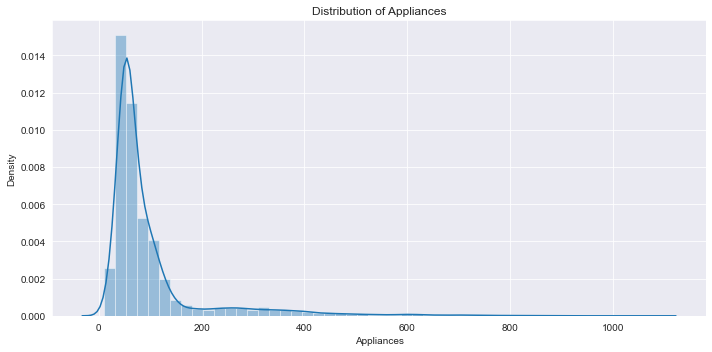

count    19735.000000
mean         3.801875
std          7.935988
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: lights, dtype: float64


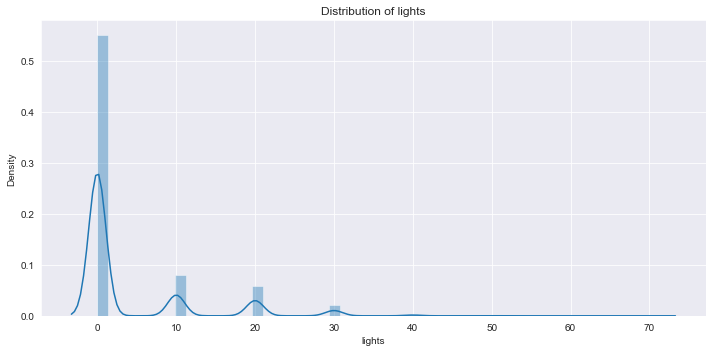

count    19735.000000
mean        21.686571
std          1.606066
min         16.790000
25%         20.760000
50%         21.600000
75%         22.600000
max         26.260000
Name: T1, dtype: float64


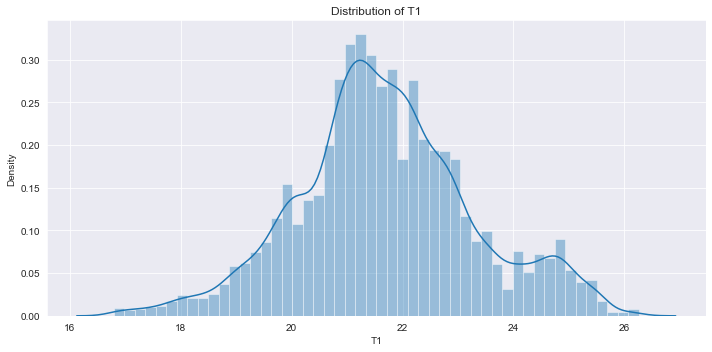

count    19735.000000
mean        40.259739
std          3.979299
min         27.023333
25%         37.333333
50%         39.656667
75%         43.066667
max         63.360000
Name: RH_1, dtype: float64


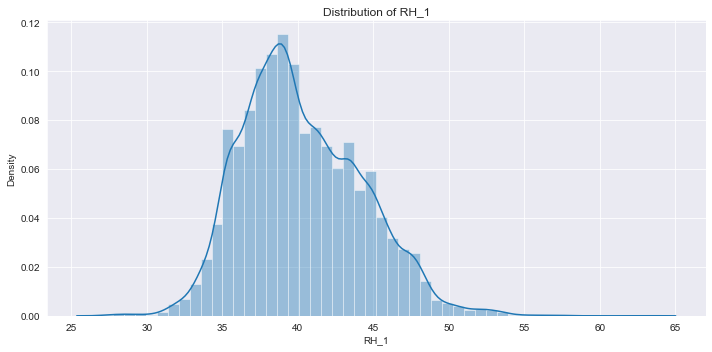

count    19735.000000
mean        20.341219
std          2.192974
min         16.100000
25%         18.790000
50%         20.000000
75%         21.500000
max         29.856667
Name: T2, dtype: float64


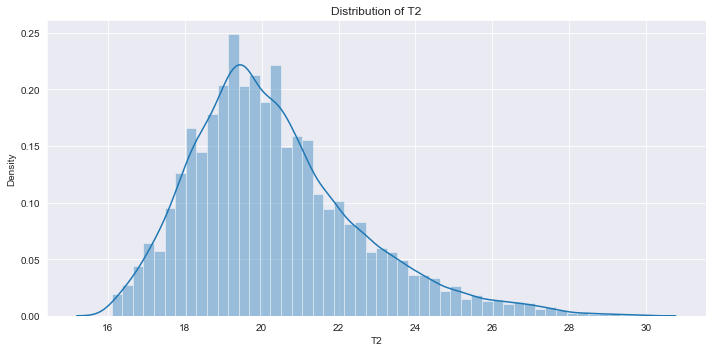

count    19735.000000
mean        40.420420
std          4.069813
min         20.463333
25%         37.900000
50%         40.500000
75%         43.260000
max         56.026667
Name: RH_2, dtype: float64


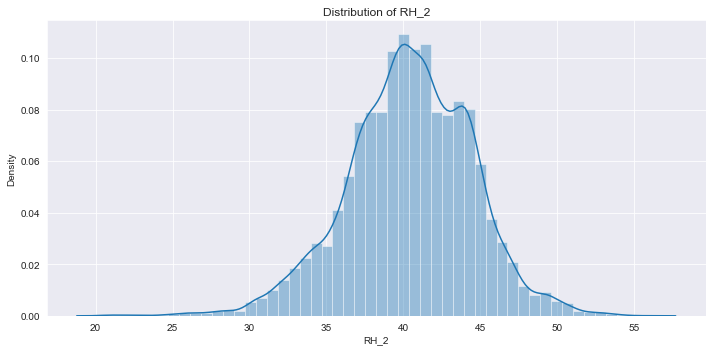

count    19735.000000
mean        22.267611
std          2.006111
min         17.200000
25%         20.790000
50%         22.100000
75%         23.290000
max         29.236000
Name: T3, dtype: float64


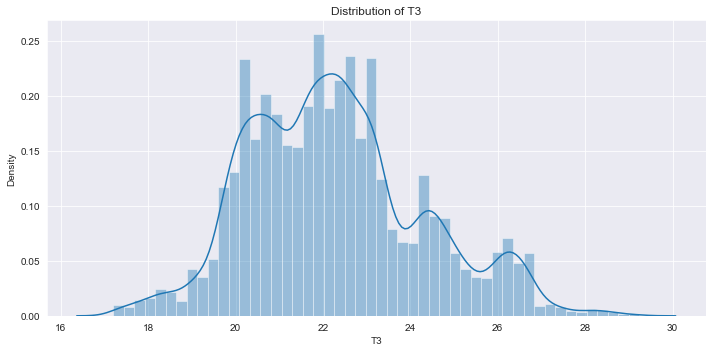

count    19735.000000
mean        39.242500
std          3.254576
min         28.766667
25%         36.900000
50%         38.530000
75%         41.760000
max         50.163333
Name: RH_3, dtype: float64


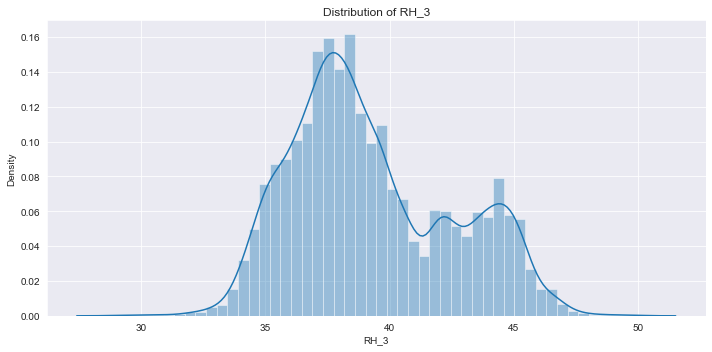

count    19735.000000
mean        20.855335
std          2.042884
min         15.100000
25%         19.530000
50%         20.666667
75%         22.100000
max         26.200000
Name: T4, dtype: float64


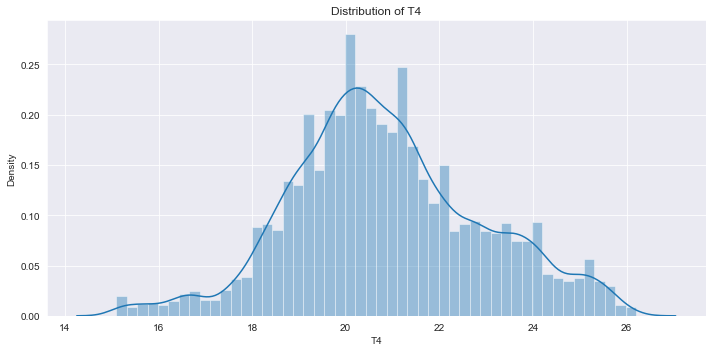

count    19735.000000
mean        39.026904
std          4.341321
min         27.660000
25%         35.530000
50%         38.400000
75%         42.156667
max         51.090000
Name: RH_4, dtype: float64


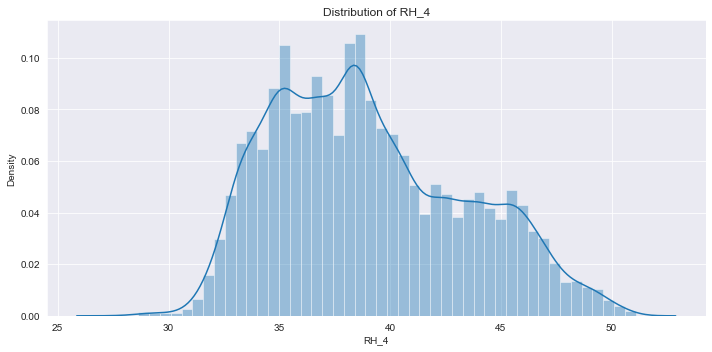

count    19735.000000
mean        19.592106
std          1.844623
min         15.330000
25%         18.277500
50%         19.390000
75%         20.619643
max         25.795000
Name: T5, dtype: float64


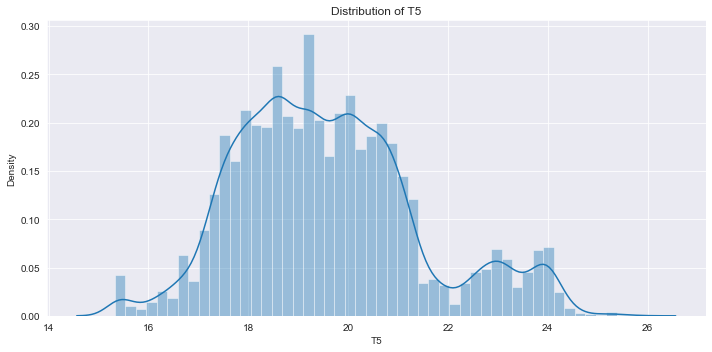

count    19735.000000
mean        50.949283
std          9.022034
min         29.815000
25%         45.400000
50%         49.090000
75%         53.663333
max         96.321667
Name: RH_5, dtype: float64


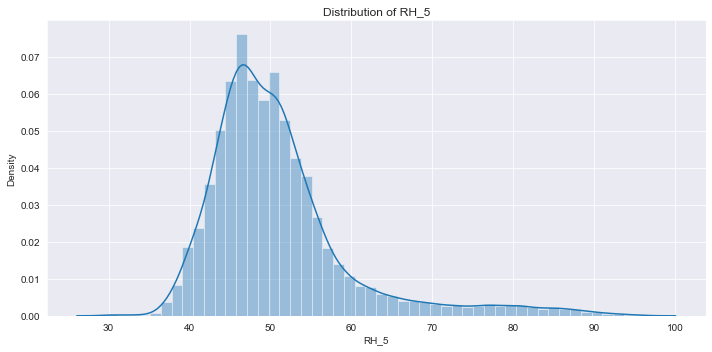

count    19735.000000
mean         7.910939
std          6.090347
min         -6.065000
25%          3.626667
50%          7.300000
75%         11.256000
max         28.290000
Name: T6, dtype: float64


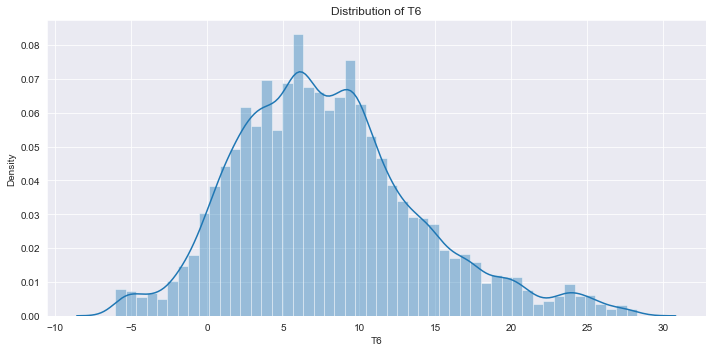

count    19735.000000
mean        54.609083
std         31.149806
min          1.000000
25%         30.025000
50%         55.290000
75%         83.226667
max         99.900000
Name: RH_6, dtype: float64


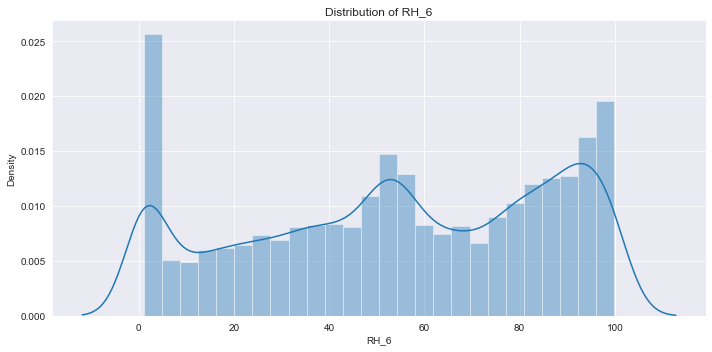

count    19735.000000
mean        20.267106
std          2.109993
min         15.390000
25%         18.700000
50%         20.033333
75%         21.600000
max         26.000000
Name: T7, dtype: float64


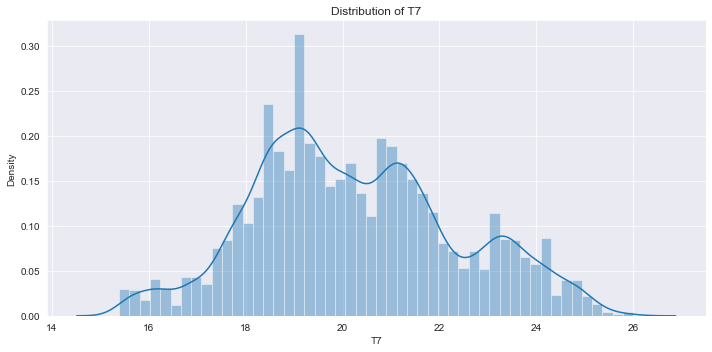

count    19735.000000
mean        35.388200
std          5.114208
min         23.200000
25%         31.500000
50%         34.863333
75%         39.000000
max         51.400000
Name: RH_7, dtype: float64


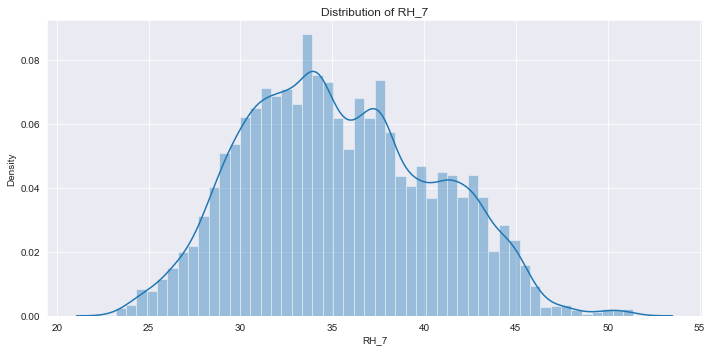

count    19735.000000
mean        22.029107
std          1.956162
min         16.306667
25%         20.790000
50%         22.100000
75%         23.390000
max         27.230000
Name: T8, dtype: float64


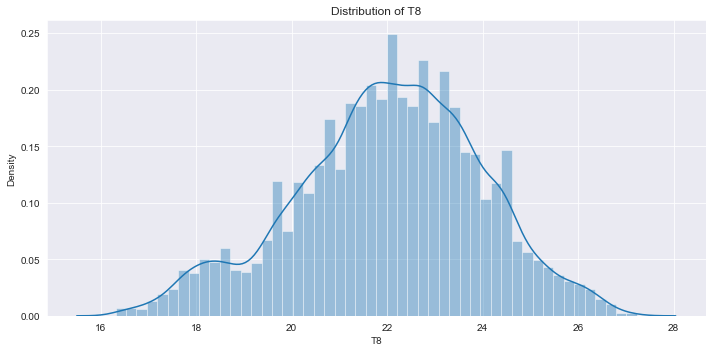

count    19735.000000
mean        42.936165
std          5.224361
min         29.600000
25%         39.066667
50%         42.375000
75%         46.536000
max         58.780000
Name: RH_8, dtype: float64


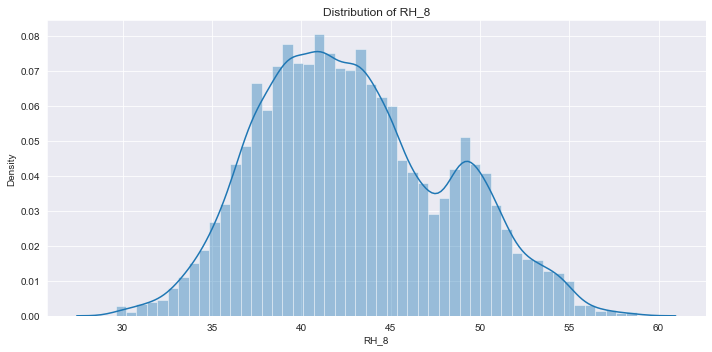

count    19735.000000
mean        19.485828
std          2.014712
min         14.890000
25%         18.000000
50%         19.390000
75%         20.600000
max         24.500000
Name: T9, dtype: float64


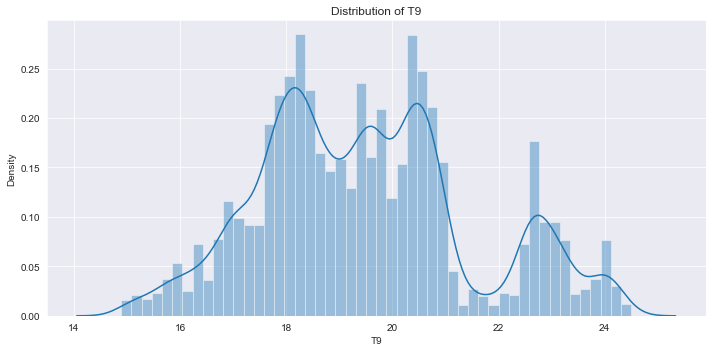

count    19735.000000
mean        41.552401
std          4.151497
min         29.166667
25%         38.500000
50%         40.900000
75%         44.338095
max         53.326667
Name: RH_9, dtype: float64


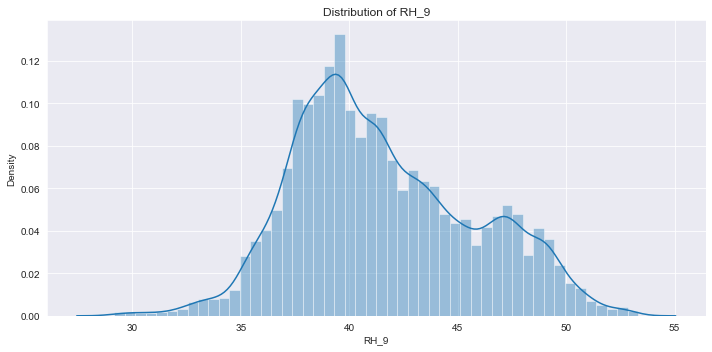

count    19735.000000
mean         7.411665
std          5.317409
min         -5.000000
25%          3.666667
50%          6.916667
75%         10.408333
max         26.100000
Name: T_out, dtype: float64


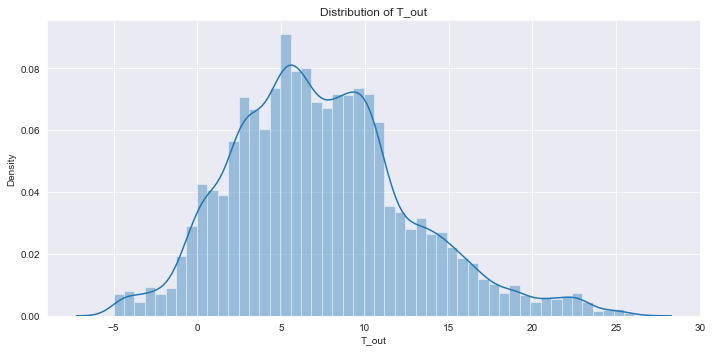

count    19735.000000
mean       755.522602
std          7.399441
min        729.300000
25%        750.933333
50%        756.100000
75%        760.933333
max        772.300000
Name: Press_mm_hg, dtype: float64


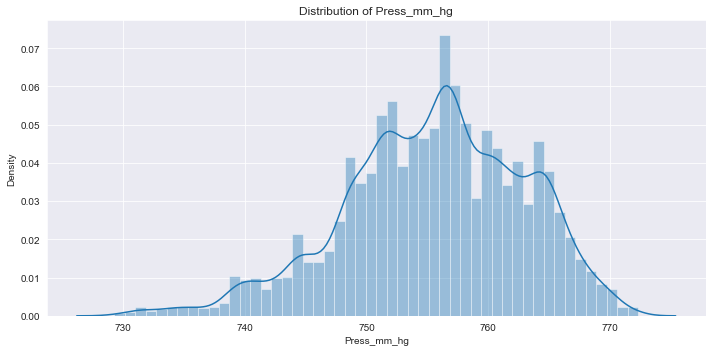

count    19735.000000
mean        79.750418
std         14.901088
min         24.000000
25%         70.333333
50%         83.666667
75%         91.666667
max        100.000000
Name: RH_out, dtype: float64


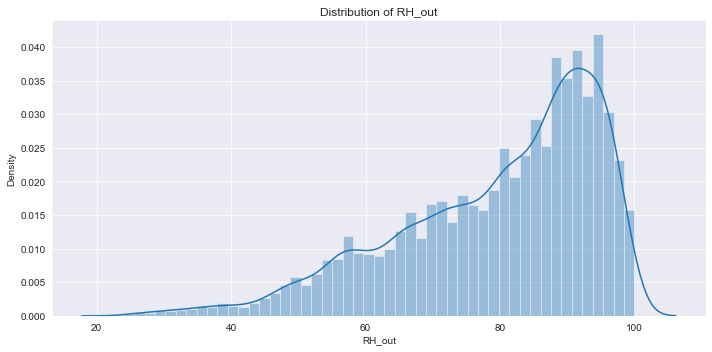

count    19735.000000
mean         4.039752
std          2.451221
min          0.000000
25%          2.000000
50%          3.666667
75%          5.500000
max         14.000000
Name: Windspeed, dtype: float64


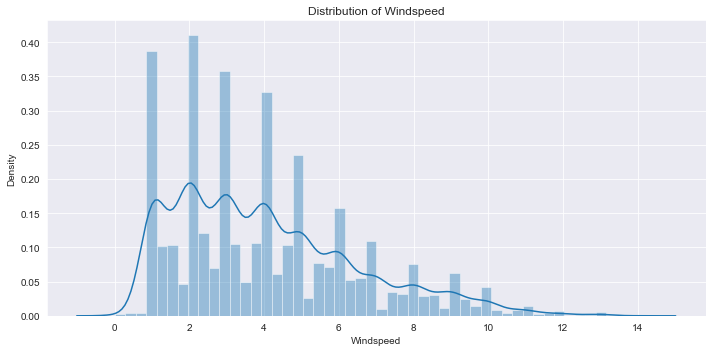

count    19735.000000
mean        38.330834
std         11.794719
min          1.000000
25%         29.000000
50%         40.000000
75%         40.000000
max         66.000000
Name: Visibility, dtype: float64


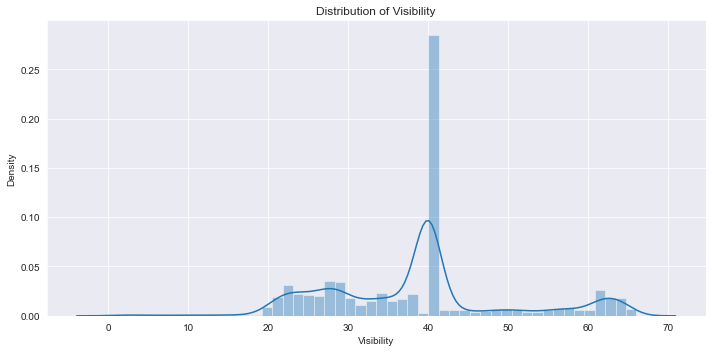

count    19735.000000
mean         3.760707
std          4.194648
min         -6.600000
25%          0.900000
50%          3.433333
75%          6.566667
max         15.500000
Name: Tdewpoint, dtype: float64


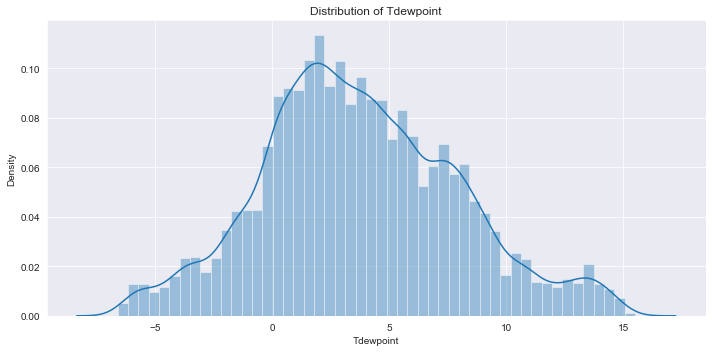

count    19735.000000
mean        24.988033
std         14.496634
min          0.005322
25%         12.497889
50%         24.897653
75%         37.583769
max         49.996530
Name: rv1, dtype: float64


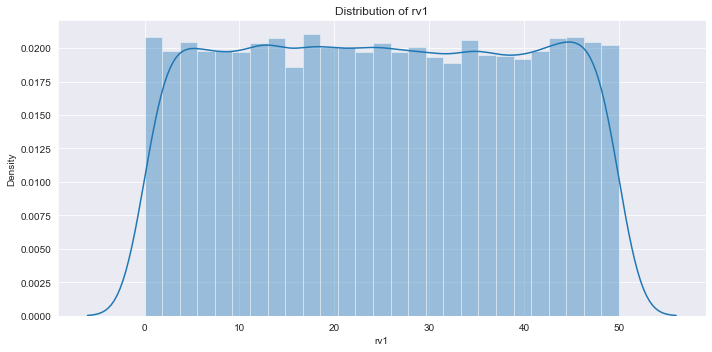

count    19735.000000
mean        24.988033
std         14.496634
min          0.005322
25%         12.497889
50%         24.897653
75%         37.583769
max         49.996530
Name: rv2, dtype: float64


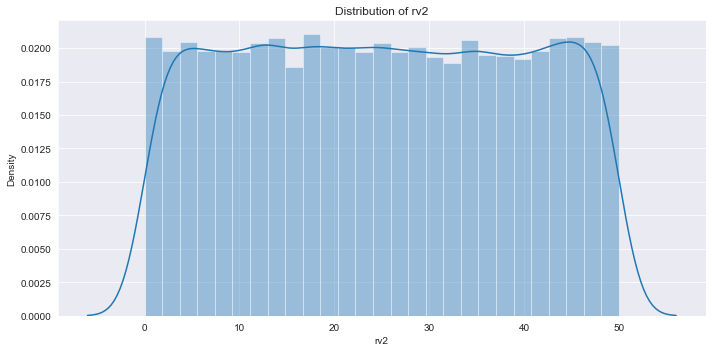

In [8]:
sns.set_style("darkgrid")
numeric_distribution_plot(df)

In [9]:
# Plotting the Correlation
df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


#### Plotting a heatmap of all the columns

<AxesSubplot:>

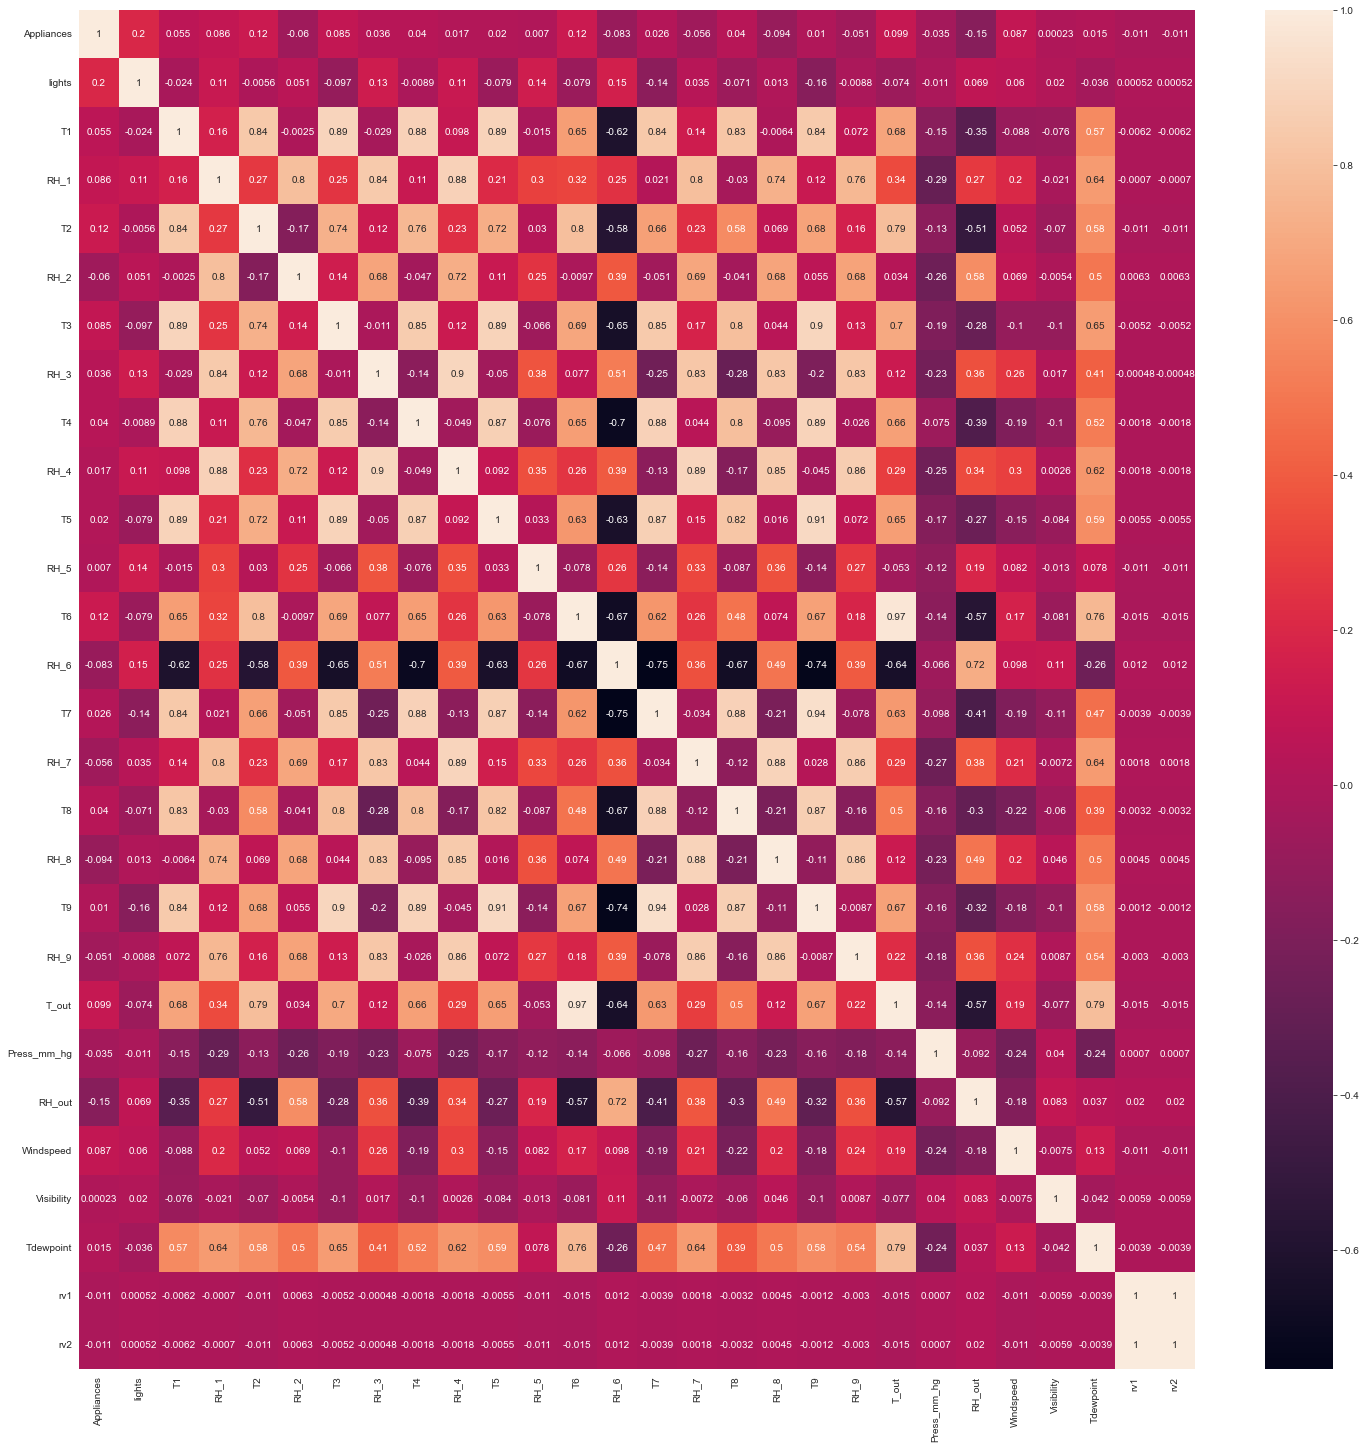

In [10]:
plt.figure(figsize=(25,25))
correlation = df.corr()
sns.heatmap(df.corr(), annot=True)

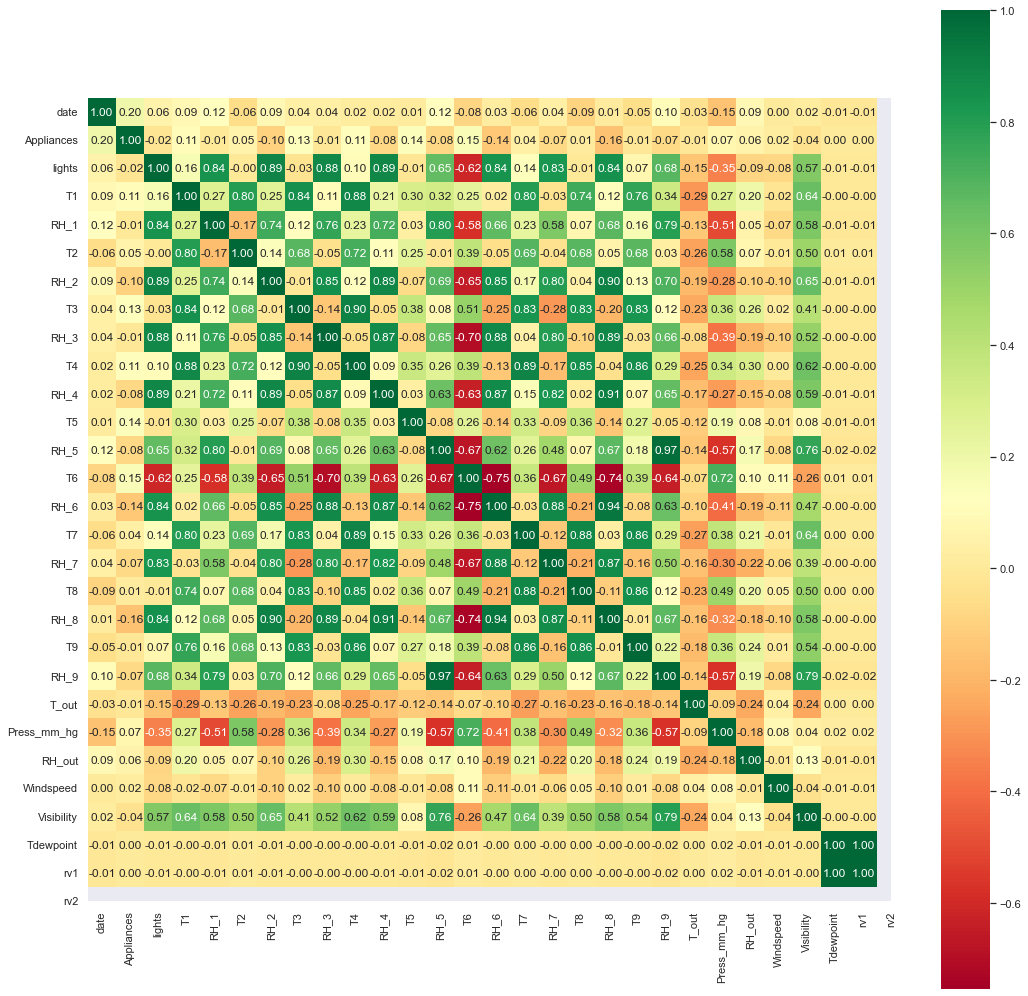

In [11]:
# Pearson Correlation among the variables

col = ['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2']
corr = df[col].corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

### Question 12
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

In [12]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)

In [13]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#Fitting simple Linear Regression Model
linr_model = LinearRegression().fit('T2','T6')
linr_model

ValueError: Expected 2D array, got scalar array instead:
array=T2.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Question 13
Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['date', 'lights'], inplace=True)
target_variable = normalised_df['date']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

### Question 14
What is the Residual Sum of Squares (in two decimal places)?

In [ ]:
# ● Residual Sum of Squares (RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

### Question 15
What is the Root Mean Squared Error (in three decimal places)?

In [ ]:
# ● Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

### Question 16
What is the Coefficient of Determination (in two decimal places)?

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

### Question 17
Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [ ]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

### Question 18
Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.4)
reg.fit(x_train, y_train)

### Question 19
Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.001)
reg.fit(x_train, y_train)

### Question 20
What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [ ]:
# ● Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)